# Обработка данных

In [2]:
import numpy as np  # быстрые математические операции
import pandas as pd # для считывания данных

**pd.read_csv** - считывается структурированные данные из csv-таблицы (столбцы * строки образуют строгую таблицу) 

In [3]:
Y = pd.read_csv('shifts.csv')

ParserError: Error tokenizing data. C error: Expected 3 fields in line 3, saw 4


In [4]:
Y = pd.read_csv('shifts.csv', sep='\t') 
# разделитель по умолчанию sep=',', в данном случае пришлось заменить его на табуляцию

In [39]:
Y.head() # как видите, в ячейках могут встречаться запятые

,ID,Source,Direction,Target,Status,Contributor,Shift Type,Language,Language ID,Lexeme,Source/Sense1,Target/Sense2,Reference,Comments,Contributor.1
0,1,"to calculate, count",→,to take into account,Accepted,AZ,Polysemy,Sanskrit,sans1269,gaṇ,"'to count, to reckon'",'to take into account',,Кочергина 187,MR
1,2,"to calculate, count",—,to respect,Accepted,AZ,Polysemy,Khmer,khme1253,rɔap,'count',"'esteem, respect'",,"Haser 2000, 181",MR
2,3,to find,→,to have opinion,Accepted,DG,Polysemy,Ancient Greek,anci1242,εὑρίσκω,"'to find, to discover'",'to count',,Cf. Modern Greek βρίσκω 'find: have opinion' ...,MR
3,4,to taste,↔,"to try, to attempt",Accepted,DG,Polysemy,Swahili,swah1253,onja,'taste','try',,"Haser 2000, 176, Polikanov",MR
4,5,"to go, walk",→,to find,Accepted,DG,Polysemy,Lithuanian,lith1251,apeíti,'to go round','to find',,LRŽ 33,MR


При работе с csv через pandas, вы получаете объект под названием DataFrame, который состоит из строк и столбцов. Вы можете получать столбцы таким же образом, каким получаете элементы словаря.

In [3]:
Y['Language']

0                  Sanskrit
1                     Khmer
2             Ancient Greek
3                   Swahili
4                Lithuanian
5          Mandarin Chinese
6                 Icelandic
7                     Mehri
8                 Hungarian
9       Mongolian (Khalkha)
10                     Zulu
11                 Kilivila
12                     Fula
13                   Bezhta
14                  Russian
15                Icelandic
16                  Russian
17                 Nganasan
18                  Turkish
19                   Gagauz
20                   Gagauz
21                 Chamalal
22               Vietnamese
23                  Russian
24                  Lezgian
25                   Bezhta
26                  English
27                  English
28                   Polish
29                   Danish
               ...         
3678                  Langi
3679                  Maori
3680                Amharic
3681                   Geez
3682                

pandas не заставит вас смотреть все 3708 ячеек, но можно самостоятельно ограничить показ только верхними строками (шапкой)

In [38]:
Y['Language'].head()

0         Sanskrit
1            Khmer
2    Ancient Greek
3          Swahili
4       Lithuanian
Name: Language, dtype: object

или так

In [40]:
Y['Language'][:10]

0               Sanskrit
1                  Khmer
2          Ancient Greek
3                Swahili
4             Lithuanian
5       Mandarin Chinese
6              Icelandic
7                  Mehri
8              Hungarian
9    Mongolian (Khalkha)
Name: Language, dtype: object

In [41]:
Y.Language[:10] # если в названии столбца нет пробелов, то можно ещё и так

0               Sanskrit
1                  Khmer
2          Ancient Greek
3                Swahili
4             Lithuanian
5       Mandarin Chinese
6              Icelandic
7                  Mehri
8              Hungarian
9    Mongolian (Khalkha)
Name: Language, dtype: object

Короче, похоже на работу со списками и словарями сразу:

    Y['Language'][100:110]
    имя_датафрейма[название нужного столбика][номера нужных ячеек] (причём порядок можно менять)

In [42]:
Y[100:110]['Language']

100             Tibetan
101    Classical Arabic
102             Lezgian
103             Tibetan
104             Tibetan
105               Yakut
106             Tibetan
107             Tibetan
108            Akkadian
109             Russian
Name: Language, dtype: object

In [43]:
Y['Language'][100:110]

100             Tibetan
101    Classical Arabic
102             Lezgian
103             Tibetan
104             Tibetan
105               Yakut
106             Tibetan
107             Tibetan
108            Akkadian
109             Russian
Name: Language, dtype: object

Выбрать несколько строк = дать несколько номеров, значит, выбрать несколько столбцов = дать несколько названий

In [44]:
Y[['Language', 'Language ID']][:12]

,Language,Language ID
0,Sanskrit,sans1269
1,Khmer,khme1253
2,Ancient Greek,anci1242
3,Swahili,swah1253
4,Lithuanian,lith1251
5,Mandarin Chinese,mand1415
6,Icelandic,icel1247
7,Mehri,mehr1241
8,Hungarian,hung1274
9,Mongolian (Khalkha),halh1238


Посчитаем частоты языков

In [45]:
Y['Language'].value_counts()[:10]

Russian             368
Ancient Greek       144
Classical Arabic    120
Amharic             116
Yakut               107
Lezgian             101
Turkish              98
Latin                95
English              89
Sanskrit             85
Name: Language, dtype: int64

Столбик References почти пустой - давайте уберём его с помощью .drop()

In [46]:
Y = Y.drop(columns='Reference')
Y.head()

,ID,Source,Direction,Target,Status,Contributor,Shift Type,Language,Language ID,Lexeme,Source/Sense1,Target/Sense2,Comments,Contributor.1
0,1,"to calculate, count",→,to take into account,Accepted,AZ,Polysemy,Sanskrit,sans1269,gaṇ,"'to count, to reckon'",'to take into account',Кочергина 187,MR
1,2,"to calculate, count",—,to respect,Accepted,AZ,Polysemy,Khmer,khme1253,rɔap,'count',"'esteem, respect'","Haser 2000, 181",MR
2,3,to find,→,to have opinion,Accepted,DG,Polysemy,Ancient Greek,anci1242,εὑρίσκω,"'to find, to discover'",'to count',Cf. Modern Greek βρίσκω 'find: have opinion' ...,MR
3,4,to taste,↔,"to try, to attempt",Accepted,DG,Polysemy,Swahili,swah1253,onja,'taste','try',"Haser 2000, 176, Polikanov",MR
4,5,"to go, walk",→,to find,Accepted,DG,Polysemy,Lithuanian,lith1251,apeíti,'to go round','to find',LRŽ 33,MR


Давайте посмотрим строки, где есть реализации для русского языка. Для этого в столбике Language нужно выбрать язык Russian, что делается вот так:

In [6]:
R = Y[Y['Language'] == 'Russian']
R.head()

,ID,Source,Direction,Target,Status,Contributor,Shift Type,Language,Language ID,Lexeme,Source/Sense1,Target/Sense2,Reference,Comments,Contributor.1
14,15,<hat>,—,fool,Accepted,IG,Polysemy,Russian,russ1263,šljapa,'hat','ninny',,,IG
16,17,salty,—,funny,Suspended,IG,Polysemy,Russian,russ1263,solenyj,'salty','obscene',,,IG
23,24,"to get, obtain",→,to manage to do smth,New,DG,Derivation,Russian,russ1263,polučat','who: NOM : what: ACC: from whom: from+GEN',NaN,,,DG
58,59,correct (adj.),—,right (vs. left),Accepted,IG,Polysemy,Russian,russ1263,pravyj,'right','right',,,IG
65,66,to make noise,→,to speak,Accepted,IG,Semantic evolution,Russian,russ1263,galdet',"'to clamor, to make a racket'",Russian,,"the second meaning is dialectal (Simbirsk, Pe...",MR


In [9]:
R = R.reset_index() 
R = R.drop(columns='index')
R.head()

,ID,Source,Direction,Target,Status,Contributor,Shift Type,Language,Language ID,Lexeme,Source/Sense1,Target/Sense2,Reference,Comments,Contributor.1
0,15,<hat>,—,fool,Accepted,IG,Polysemy,Russian,russ1263,šljapa,'hat','ninny',,,IG
1,17,salty,—,funny,Suspended,IG,Polysemy,Russian,russ1263,solenyj,'salty','obscene',,,IG
2,24,"to get, obtain",→,to manage to do smth,New,DG,Derivation,Russian,russ1263,polučat','who: NOM : what: ACC: from whom: from+GEN',NaN,,,DG
3,59,correct (adj.),—,right (vs. left),Accepted,IG,Polysemy,Russian,russ1263,pravyj,'right','right',,,IG
4,66,to make noise,→,to speak,Accepted,IG,Semantic evolution,Russian,russ1263,galdet',"'to clamor, to make a racket'",Russian,,"the second meaning is dialectal (Simbirsk, Pe...",MR


Ранее мы обращались к строкам с помощью индексов - в данном случае сами индексы можно вывести отдельно

In [50]:
Y.index

RangeIndex(start=0, stop=3708, step=1)

In [51]:
Y.loc[2001] # найдёт строку по индексу

ID                               2005
Source                           edge
Direction                           —
Target                    sharp point
Status                            New
Contributor                        MB
Shift Type                   Polysemy
Language                       Arabic
Language ID                  stan1318
Lexeme                          ḥadd-
Source/Sense1                 'edge' 
Target/Sense2                'blade' 
Comments          Lane 525: BK I 388.
Contributor.1                      MB
Name: 2001, dtype: object

In [54]:
Y.loc[2001, 'Status'] = 'Accepted' # приписывание нового значения

In [55]:
Y.loc[2001]

ID                               2005
Source                           edge
Direction                           —
Target                    sharp point
Status                       Accepted
Contributor                        MB
Shift Type                   Polysemy
Language                       Arabic
Language ID                  stan1318
Lexeme                          ḥadd-
Source/Sense1                 'edge' 
Target/Sense2                'blade' 
Comments          Lane 525: BK I 388.
Contributor.1                      MB
Name: 2001, dtype: object

In [57]:
Y.loc[2000:2010, 'Status']# = 'Accepted' # можно даже приписать сразу нескольким

2000    Accepted
2001    Accepted
2002    Accepted
2003    Accepted
2004    Accepted
2005    Accepted
2006    Accepted
2007    Accepted
2008    Accepted
2009    Accepted
2010    Accepted
Name: Status, dtype: object

In [ ]:
Y['Status'].loc[2000] = 1 # а вот так делать нельзя

In [5]:
E = Y[Y['Language'] == 'English']
Y.loc[Y[Y['Language'] == 'English'].index, 'Status'] = 'Accepted'
Y[Y['Language'] == 'English']

,ID,Source,Direction,Target,Status,Contributor,Shift Type,Language,Language ID,Lexeme,Source/Sense1,Target/Sense2,Reference,Comments,Contributor.1
26,27,"to get, obtain",→,to contain,Accepted,DG,Polysemy,English,stan1293,receive,,NaN,,,DG
27,28,"to get, obtain",→,to receive visitors,Accepted,DG,Polysemy,English,stan1293,receive,,NaN,"[Cobuild :1375, 1376]",,All
53,54,wind,→,window,Accepted,IG,Derivation,English,stan1293,wind,→,NaN,,Borrowed in the Late Old English period from ...,All
73,74,spruce (Picea),—,abies (Abies),Accepted,IG,Syncretism,English,stan1293,fir,'fur tree','silver fir',,Also Silver Fir.,TM
147,148,"nut, hazel",→,testicle,Accepted,IG,Polysemy,English,stan1293,nut,'nut','man's testicles',,,DG
187,188,flexible,—,"compliant, pliable",Accepted,IG,Polysemy,English,stan1293,pliable,'pliable',"'pliable, compliant'",,,IG
219,220,strong,→,strong (of liquid or smell),Accepted,MR,Polysemy,English,stan1293,strong,'strong','strong (drinks)',,The same in Icelandic sterkur (Berkov).,TM
233,234,to cover,→,to copulate,Accepted,IG,Polysemy,English,stan1293,to cover,'to cover','to cover (mare)',,,IG
355,356,soon,→,almost,Accepted,DG,Cognates,English,stan1293,fast,"'quickly, in a short time' — German","quickly, in a short time",,OED,DG
466,467,eye,→,centre,Accepted,TM,Polysemy,English,stan1293,eye,'eye',"'center (of science, culture)'",,,TM


In [1]:
E.head()

NameError: name 'E' is not defined

In [67]:
Y[:5]

,ID,Source,Direction,Target,Status,Contributor,Shift Type,Language,Language ID,Lexeme,Source/Sense1,Target/Sense2,Comments,Contributor.1
0,1,"to calculate, count",→,to take into account,Accepted,AZ,Polysemy,Sanskrit,sans1269,gaṇ,"'to count, to reckon'",'to take into account',Кочергина 187,MR
1,2,"to calculate, count",—,to respect,Accepted,AZ,Polysemy,Khmer,khme1253,rɔap,'count',"'esteem, respect'","Haser 2000, 181",MR
2,3,to find,→,to have opinion,Accepted,DG,Polysemy,Ancient Greek,anci1242,εὑρίσκω,"'to find, to discover'",'to count',Cf. Modern Greek βρίσκω 'find: have opinion' ...,MR
3,4,to taste,↔,"to try, to attempt",Accepted,DG,Polysemy,Swahili,swah1253,onja,'taste','try',"Haser 2000, 176, Polikanov",MR
4,5,"to go, walk",→,to find,Accepted,DG,Polysemy,Lithuanian,lith1251,apeíti,'to go round','to find',LRŽ 33,MR


In [68]:
Y.loc[5][4]

'Accepted'

In [69]:
Y.iloc[5, 4]

'Accepted'

- loc получает строки (или столбцы) с определенными метками из индекса.
- iloc получает строки (или столбцы) в определенных положениях индекса (так что он принимает только целые числа).

In [70]:
Y.loc[3, 'Language']


'Swahili'

In [71]:
Y.iloc[3, 'Language']

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [72]:
Y['Status'].unique()

array(['Accepted', 'New', 'Suspended', 'memory', ' stock', ' reason',
       'hell', ' New'], dtype=object)

#### Как тогда посмотреть всех контрибьюторов?

In [74]:
Y['Contributor'].unique()

array(['AZ', 'DG', 'IG', 'MR', 'LG', 'All', 'TM', 'MB', 'New', 'TG'],
      dtype=object)

#### Попробуйте вывести самого активного контрибьютора и языки, про которые он добавляет данные

In [ ]:
Y['']...

#### Также можно использовать всякие логические операции

In [76]:
Y[
    np.logical_and(
        Y['ID'] > 3600, 
        Y['Shift Type'] == 'Polysemy'
    )
]

,ID,Source,Direction,Target,Status,Contributor,Shift Type,Language,Language ID,Lexeme,Source/Sense1,Target/Sense2,Comments,Contributor.1
3569,3601,to be awake,→,"ambush, embuscade",New,MB,Polysemy,Geez,geez1241,tagha,"'to be awake, sleepless'",'to lie in ambush',(LLA 571),MB
3572,3604,stepson,→,sucker (botany),New,MB,Polysemy,Russian,russ1263,pasynok,'step son',"'offspring, sucker (botanic)'",Cf. Also the dial. pasynok (пасынок) 'a crook...,MR
3573,3605,descendant,—,sucker (botany),Accepted,MB,Polysemy,Italian,ital1282,pollone,'offshoot','offshoot',,MR
3576,3608,"to raise, lift (tr.)",→,"to remove, eliminate",Accepted,IG,Polysemy,English,stan1293,to raise,'to move to a higher position: elevate','to bring to an end: remove',,MB
3579,3611,to temper (iron),—,brave,New,IG,Polysemy,Tigrinya,tigr1271,täbʕe,"''to be tempered (iron), to forge, pund iron:...","''to be virile, brave, courageous, to have a m...",KT 1256. The development of the meaning is pr...,MB
3580,3612,hand,—,"cluster, bunch",Accepted,MR,Polysemy,Russian,russ1263,kist','hand','bunch (of grapes)',,MR
3581,3613,paw,—,"branch, twig",New,MR,Polysemy,Russian,russ1263,lapa,'animal limbs','fir tree branch',,IG
3582,3614,to give,→,to sell,New,IG,Polysemy,Jarawara,jama1261,ta na,'to give','to sell',JED 158.,IG
3583,3615,"to search, to look for",—,"to recall, recollect",New,IG,Polysemy,Jarawara,jama1261,siba na,'to search for','to remember',JED 152.,IG
3584,3616,"to fight, scuffle",—,to awaken,New,IG,Polysemy,Jarawara,jama1261,mowa na,'to fight against','to wake up',JED 134.,IG


In [81]:
rus_lexemes = Y[Y['Language'] == 'Russian']['Lexeme']
rus_lexemes.value_counts()

hvatat'         3
kisnut'         3
vjazat'         3
duh             3
bit'            3
usač            2
tuča            2
prihodit'       2
ryt'            2
zërnyško        2
cygan           2
palit'          2
baran           2
nevesta         2
videt'          2
ruka            2
znat'           2
hotet'          2
kusat'          2
dub             2
put'            2
nemoj           2
lomat'          2
ad              2
tonkij          2
teč'            2
brat'           2
rot             2
lit'            2
mazat'          2
               ..
nečistyj        1
vyvihnut'       1
krasnyj         1
seredina        1
grečeskij       1
obščij          1
pravil'nyj      1
sunut'          1
gryzt'          1
igra            1
polučat'        1
davit'          1
konoplja        1
černym-černo    1
toska           1
uho             1
ščipat'         1
sobaka          1
žerd'           1
hozjain         1
onemet'         1
mokryj          1
cena            1
živoj           1
grebešok  

In [82]:
eng_lexemes = Y[Y['Language'] == 'English']['Lexeme'].head()
eng_lexemes

26     receive
27     receive
53        wind
73         fir
147        nut
Name: Lexeme, dtype: object

In [77]:
vg = pd.read_csv('videogames.csv')

In [78]:
Y[
    np.logical_and(
        vg['release_year'] > 2000, 
        vg['score'] == 10
        
    )
]

/home/melisan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,ID,Source,Direction,Target,Status,Contributor,Shift Type,Language,Language ID,Lexeme,Source/Sense1,Target/Sense2,Comments,Contributor.1
3079,3106,to steal,→,to take,New,MR,Polysemy,Italian,ital1282,pigliare,'to steal','to take',Бурсье 430,MR
3080,3107,horse (Equus caballus),→,wave,New,MR,Polysemy,Italian,ital1282,cavallone,'big horse','sea wave',Бурсье 430,MR
3236,3263,tail,→,plantain (Plantago),New,MR,Derivation,Khmer,khme1253,kɒntuy,'tail' →,NaN,"Gorgoniev 1984, 33",MR


### Задание

1) Загрузите датасет из файла videogames.csv, посмотрите на него

2) Выведите все жанры игр, которые есть

3) Найдите жанр с наилучшими оценками (можно смотрть и score, и editors_choice)

4) Найдите игру с наилучшими и наихудшими оценками, вышедшую в год вашего рождения. Выведите их названия и платформы, для которых они были выпущены.

In [88]:
vg = pd.read_csv('videogames.csv')
vg1 = vg[vg['release_year'] < 2005]
vg1 = vg1.reset_index()

In [90]:
vg[
    np.logical_and(
        vg['release_year'] == 1996, 
        vg['score'] > 9
        
    )
]

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
484,484,Amazing,Wave Race 64,/games/wave-race-64/n64-81,Nintendo 64,9.7,Racing,Y,1996,11,15
514,514,Amazing,Super Mario 64,/games/super-mario-64/n64-606,Nintendo 64,9.8,Platformer,Y,1996,9,25
576,576,Amazing,Tomb Raider -- Featuring Lara Croft,/games/tomb-raider-featuring-lara-croft/ps-97,PlayStation,9.3,Adventure,N,1996,12,13


In [ ]:
vg['score'].

## Рисование графиков

In [92]:
import matplotlib.pyplot as plt

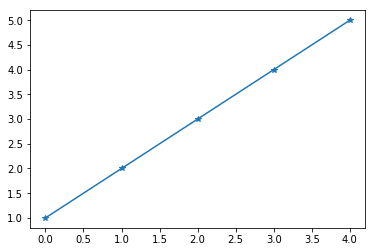

In [94]:
plt.plot([1, 2, 3, 4, 5], marker='*')
plt.show()

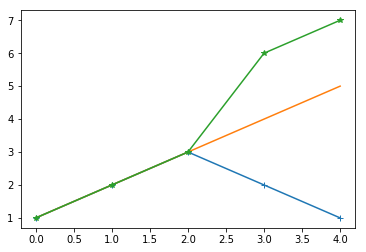

In [96]:
plt.plot([1, 2, 3, 2, 1], marker='+')
plt.plot([1, 2, 3, 4, 5])
plt.plot([1, 2, 3, 6, 7], marker='*')
plt.show()

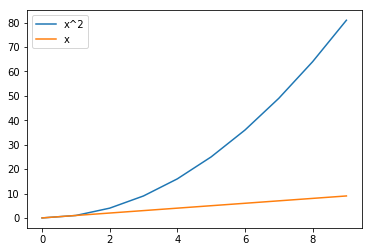

In [16]:
xs = range(10)
ys = [x**2 for x in xs] # наш стандартный генератор
plt.plot(xs, ys, label='x^2')
plt.plot(xs, xs, label='x')
plt.legend() # если не вызвать, то легенда не появится
plt.show()

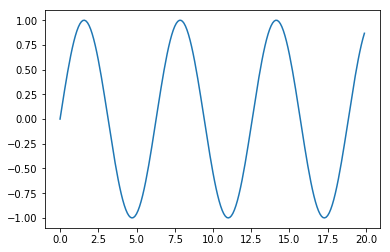

In [18]:
xs = np.arange(0, 20, 0.1) #  arange() аналогична range(), только вместо \списков возвращает массивы, и принимает не только целые значения
ys = np.sin(xs) # синус от каждого элемента массива
plt.plot(xs, ys)
plt.show()

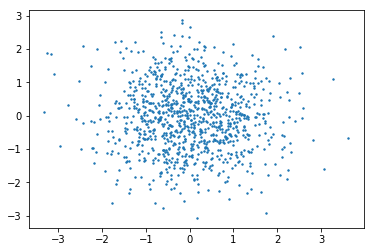

In [97]:
xs = np.random.normal(size=1000)
ys = np.random.normal(size=1000)
plt.scatter(xs, ys, s=2)
plt.show()

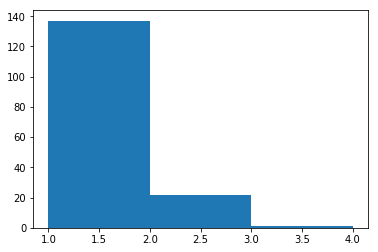

In [34]:
plt.hist(xs, bins=[1, 2, 3, 4])
plt.show()